# Image Classification of COVID-19 X-rays
# Task 1 

## Binary Classification: COVID-19 vs. Normal

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.1'

#### Loading Image Data

In [2]:
DATA_LIST = os.listdir('two/train')
DATASET_PATH  = 'two/train'
TEST_DIR =  'two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10 
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0005 # started off with rate of 0.001 before reducing it gradually 

#### Generating Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

C:\Users\accur\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


#### Building Model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.applications.VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet',classes=NUM_CLASSES),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu',name='dense_feature'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, 'sigmoid')])

model.get_layer('vgg16').trainable = False
model.build(input_shape=(None,224,224,3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 128)               3211392   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 17,926,209
Trainable params: 3,211,521
Non-trainable params: 14,714,688
____________________________________

#### Training Model

In [5]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size


model.compile(tf.keras.optimizers.Adam(lr=LEARNING_RATE), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_batches, epochs=NUM_EPOCHS,
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_steps=STEP_SIZE_VALID,
                    validation_data=valid_batches)


11
3


C:\Users\accur\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\accur\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
10/10 [==============================] - 16s 2s/step - loss: 0.9349 - accuracy: 0.4894 - val_loss: 0.2577 - val_accuracy: 0.9500
Epoch 2/40
10/10 [==============================] - 16s 2s/step - loss: 0.4811 - accuracy: 0.7979 - val_loss: 0.2258 - val_accuracy: 0.9500
Epoch 3/40
10/10 [==============================] - 15s 2s/step - loss: 0.3357 - accuracy: 0.8511 - val_loss: 0.1683 - val_accuracy: 0.9500
Epoch 4/40
10/10 [==============================] - 17s 2s/step - loss: 0.2804 - accuracy: 0.9043 - val_loss: 0.1462 - val_accuracy: 0.9500
Epoch 5/40
10/10 [==============================] - 15s 2s/step - loss: 0.2144 - accuracy: 0.8936 - val_loss: 0.1349 - val_accuracy: 0.9000
Epoch 6/40
10/10 [==============================] - 16s 2s/step - loss: 0.2406 - accuracy: 0.8936 - val_loss: 0.0744 - val_accuracy: 1.0000
Epoch 7/40
10/10 [==============================] - 15s 2s/step - loss: 0.2535 - accuracy: 0.9043 - val_loss: 0.0799 - val_accuracy: 0.9500
Epoch 8/40
10/10 [==

#### Plotting Accuracy and Loss During Training

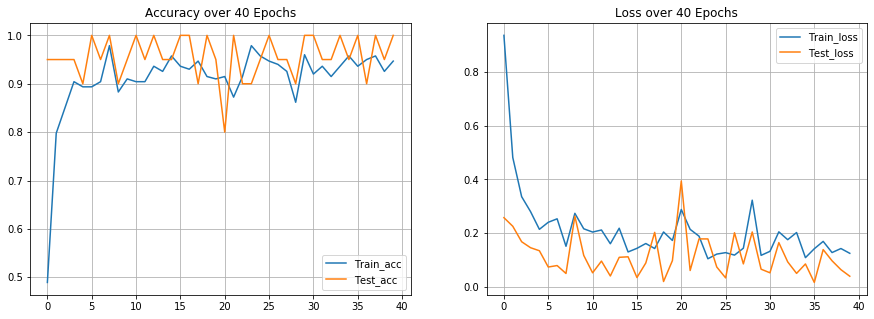

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label = 'Test_acc')
plt.title('Accuracy over 40 Epochs')
plt.legend(loc='lower right')
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'Test_loss')
plt.title('Loss over 40 Epochs')
plt.legend(loc='upper right')

plt.grid(True)
plt.show()

#### Plotting Test Results

Found 18 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
18/18 [==============================] - 3s 142ms/step
covid\nejmoa2001191_f3-PA.jpeg


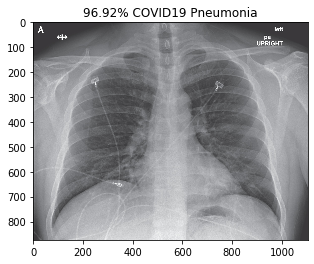

covid\nejmoa2001191_f4.jpeg


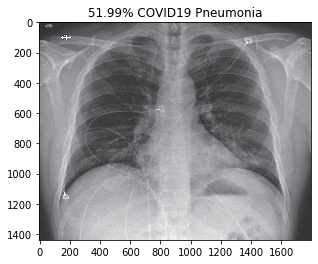

covid\nejmoa2001191_f5-PA.jpeg


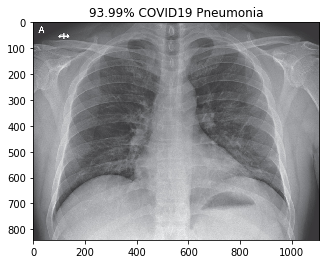

covid\radiol.2020200490.fig3.jpeg


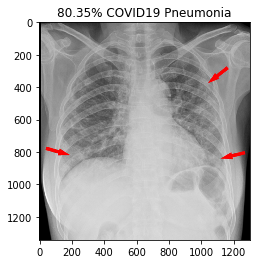

covid\ryct.2020200028.fig1a.jpeg


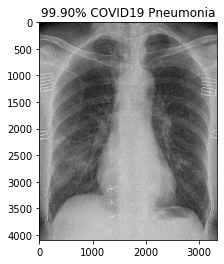

covid\ryct.2020200034.fig2.jpeg


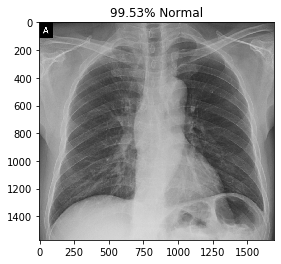

covid\ryct.2020200034.fig5-day0.jpeg


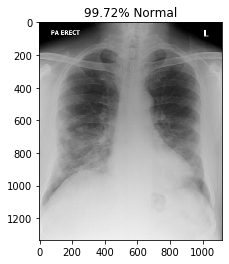

covid\ryct.2020200034.fig5-day4.jpeg


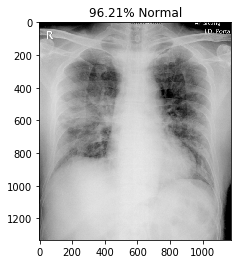

covid\ryct.2020200034.fig5-day7.jpeg


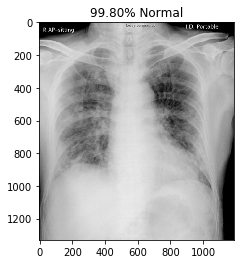

normal\NORMAL2-IM-1385-0001.jpeg


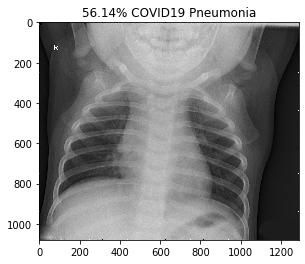

normal\NORMAL2-IM-1396-0001.jpeg


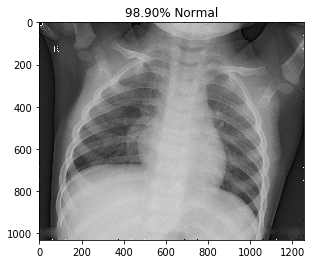

normal\NORMAL2-IM-1400-0001.jpeg


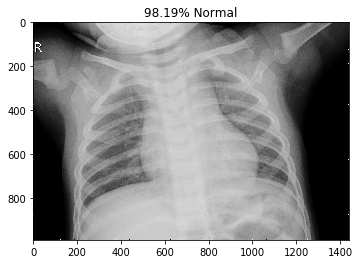

normal\NORMAL2-IM-1401-0001.jpeg


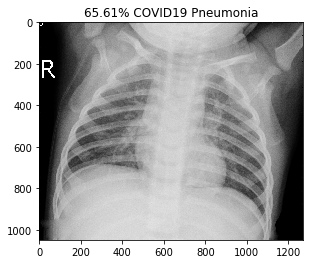

normal\NORMAL2-IM-1406-0001.jpeg


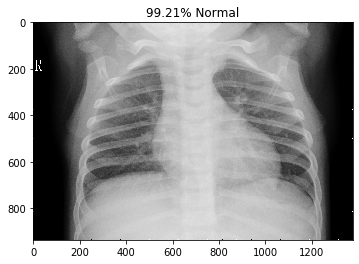

normal\NORMAL2-IM-1412-0001.jpeg


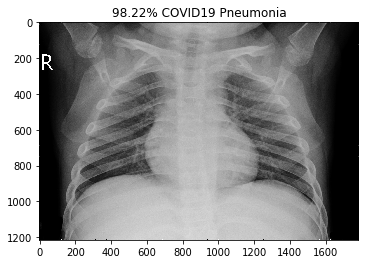

normal\NORMAL2-IM-1419-0001.jpeg


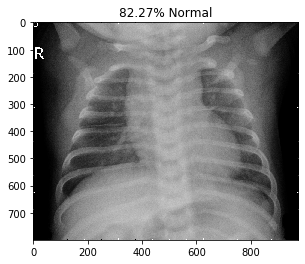

normal\NORMAL2-IM-1422-0001.jpeg


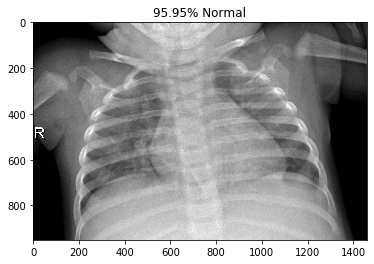

normal\NORMAL2-IM-1423-0001.jpeg


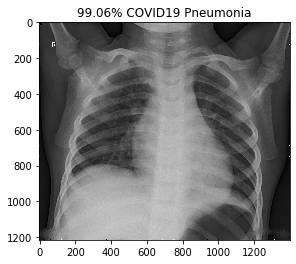

In [7]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

## TSNE Plot

Found 130 images belonging to 2 classes.


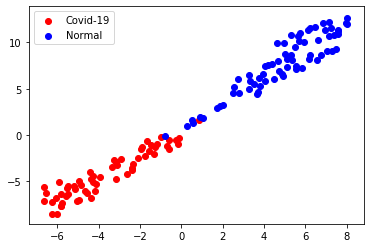

In [8]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.inputs,
                                        outputs=model.get_layer('dense_feature').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

y_pred = intermediate_layer_model.predict(tsne_data_generator)
y = tsne_data_generator.labels
X_2d = TSNE(n_components=2, random_state=0).fit_transform(y_pred)

label_names = ["Covid-19","Normal"]
colors = 'r', 'b'

for i, c, label in zip(range(len(y_pred)), colors, label_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()


<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->